In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

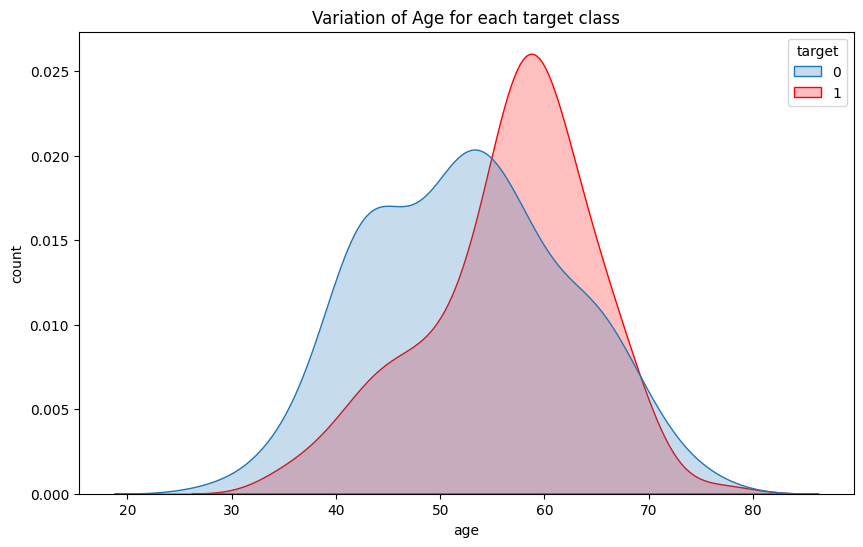

In [13]:
#Bài tập 1: distribution of target vs age
plt.figure(figsize=(10,6))
kernel_distribution_target_age_plot = sns.kdeplot(
    data=df, x='age', hue='target', fill=True, palette=[sns.color_palette()[0],'red']
).set(title='Variation of Age for each target class')
plt.xlabel('age')
plt.ylabel('count')
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23072\3661241611.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='sex', y='age', hue='target', ci='sd', palette=['blue', 'orange'])


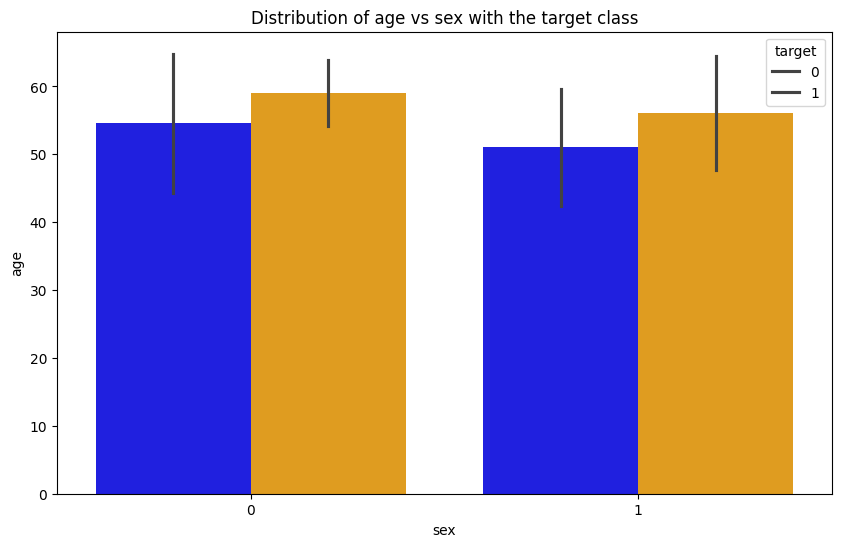

In [15]:
# Bài tập 2: barplot of age vs sex with hue = target
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='sex', y='age', hue='target', ci='sd', palette=['blue', 'orange'])

plt.title('Distribution of age vs sex with the target class')
plt.xlabel('sex')
plt.ylabel('age')
plt.legend(title='target', loc='upper right', labels=['0', '1'])
plt.xticks(ticks=[0, 1], labels=['0', '1'])
plt.show()

plt.show()

In [16]:
# Bài tập 3: 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Tách dữ liệu thành biến đầu vào và đầu ra
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình KNN
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')

# Huấn luyện mô hình với tập huấn luyện
knn.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Tính toán ma trận nhầm lẫn cho cả tập huấn luyện và tập kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


In [22]:
# Bài tập 4:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Tách dữ liệu thành biến đầu vào và đầu ra
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra và tập huấn luyện
y_test_pred = svm_model.predict(X_test)
y_train_pred = svm_model.predict(X_train)

# Tính toán ma trận nhầm lẫn cho cả tập huấn luyện và tập kiểm tra
cm_test = confusion_matrix(y_test, y_test_pred)
cm_train = confusion_matrix(y_train, y_train_pred)

# Tính độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)


# In kết quả
print("Confusion Matrix (Training):\n", cm_train)
print("Confusion Matrix (Testing):\n", cm_test)
print('Accuracy for training set for SVM = {}'.format(accuracy_for_train))
print('Accuracy for test set for SVM = {}'.format(accuracy_for_test))

Confusion Matrix (Training):
 [[114  21]
 [ 61  46]]
Confusion Matrix (Testing):
 [[26  3]
 [17 15]]
Accuracy for training set for SVM = 0.66
Accuracy for test set for SVM = 0.67


In [19]:
#Bài tập 5: 
from sklearn.naive_bayes import GaussianNB

# Tách dữ liệu thành biến đầu vào và đầu ra
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = nb_model.predict(X_test)

# Tính toán ma trận nhầm lẫn và độ chính xác
cm_test = confusion_matrix(y_test, y_pred)
accuracy_for_test = accuracy_score(y_test, y_pred)

# Tính toán độ chính xác cho tập huấn luyện
y_train_pred = nb_model.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred)
accuracy_for_train = accuracy_score(y_train, y_train_pred)

# In kết quả
print("Confusion Matrix (Training):\n", cm_train)
print("Confusion Matrix (Testing):\n", cm_test)
print('Accuracy for training set for Naive Bayes = {}'.format(np.round(accuracy_for_train, 2)))
print('Accuracy for test set for Naive Bayes = {}'.format(np.round(accuracy_for_test, 2)))

Confusion Matrix (Training):
 [[122  13]
 [ 24  83]]
Confusion Matrix (Testing):
 [[26  3]
 [ 7 25]]
Accuracy for training set for Naive Bayes = 0.85
Accuracy for test set for Naive Bayes = 0.84


In [21]:
#Bài tập 6:
from sklearn.tree import DecisionTreeClassifier

# Tách dữ liệu thành biến đầu vào và đầu ra
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình Decision Tree
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2)
dt_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = dt_model.predict(X_test)

# Tính toán ma trận nhầm lẫn và độ chính xác
cm_test = confusion_matrix(y_test, y_pred)
accuracy_for_test = accuracy_score(y_test, y_pred)

# Tính toán độ chính xác cho tập huấn luyện
y_train_pred = dt_model.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred)
accuracy_for_train = accuracy_score(y_train, y_train_pred)

# In kết quả
print("Confusion Matrix (Training):\n", cm_train)
print("Confusion Matrix (Testing):\n", cm_test)
print('Accuracy for training set for Decision Tree = {}'.format(np.round(accuracy_for_train, 2)))
print('Accuracy for test set for Decision Tree = {}'.format(np.round(accuracy_for_test, 2)))

Confusion Matrix (Training):
 [[135   0]
 [  0 107]]
Confusion Matrix (Testing):
 [[22  7]
 [ 8 24]]
Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.75


In [23]:
#Bài tập 7:
from sklearn.ensemble import RandomForestClassifier

# Tách dữ liệu thành biến đầu vào và đầu ra
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình Random Forest 
rf_model = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators = 10, random_state=42)
rf_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra và tập huấn luyện
y_test_pred = rf_model.predict(X_test)
y_train_pred = rf_model.predict(X_train)

# Tính toán ma trận nhầm lẫn cho cả tập huấn luyện và tập kiểm tra
cm_test = confusion_matrix(y_test, y_test_pred)
cm_train = confusion_matrix(y_train, y_train_pred)

# Tính độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)


# In kết quả
print("Confusion Matrix (Training):\n", cm_train)
print("Confusion Matrix (Testing):\n", cm_test)
print('Accuracy for training set for Random Forest = {}'.format(accuracy_for_train))
print('Accuracy for test set for Random Forest = {}'.format(accuracy_for_test))

Confusion Matrix (Training):
 [[133   2]
 [  2 105]]
Confusion Matrix (Testing):
 [[25  4]
 [ 8 24]]
Accuracy for training set for Random Forest = 0.98
Accuracy for test set for Random Forest = 0.8


In [24]:
#Bài tập 8:
from sklearn.ensemble import AdaBoostClassifier

# Tách dữ liệu thành biến đầu vào và đầu ra
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình Adaboost 
ada_model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
ada_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra và tập huấn luyện
y_test_pred = ada_model.predict(X_test)
y_train_pred = ada_model.predict(X_train)

# Tính toán ma trận nhầm lẫn cho cả tập huấn luyện và tập kiểm tra
cm_test = confusion_matrix(y_test, y_test_pred)
cm_train = confusion_matrix(y_train, y_train_pred)

# Tính độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)


# In kết quả
print("Confusion Matrix (Training):\n", cm_train)
print("Confusion Matrix (Testing):\n", cm_test)
print('Accuracy for training set for Adaboost = {}'.format(accuracy_for_train))
print('Accuracy for test set for Adaboost = {}'.format(accuracy_for_test))

Confusion Matrix (Training):
 [[126   9]
 [ 12  95]]
Confusion Matrix (Testing):
 [[26  3]
 [ 7 25]]
Accuracy for training set for Adaboost = 0.91
Accuracy for test set for Adaboost = 0.84


In [25]:
#Bài tập 9:
from sklearn.ensemble import GradientBoostingClassifier

# Tách dữ liệu thành biến đầu vào và đầu ra
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình GradientBoost
gradient_boost_model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3, random_state=42)
gradient_boost_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra và tập huấn luyện
y_test_pred = gradient_boost_model.predict(X_test)
y_train_pred = gradient_boost_model.predict(X_train)

# Tính toán ma trận nhầm lẫn cho cả tập huấn luyện và tập kiểm tra
cm_test = confusion_matrix(y_test, y_test_pred)
cm_train = confusion_matrix(y_train, y_train_pred)

# Tính độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả
print("Confusion Matrix (Training):\n", cm_train)
print("Confusion Matrix (Testing):\n", cm_test)
print('Accuracy for training set for GradientBoost = {}'.format(accuracy_for_train))
print('Accuracy for test set for GradientBoost = {}'.format(accuracy_for_test))

Confusion Matrix (Training):
 [[135   0]
 [  1 106]]
Confusion Matrix (Testing):
 [[25  4]
 [ 5 27]]
Accuracy for training set for GradientBoost = 1.0
Accuracy for test set for GradientBoost = 0.85


In [28]:
#Bài tập 10:
import xgboost as xgb

# Tách dữ liệu thành biến đầu vào và đầu ra
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình XGBoost
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=100)
xgb_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra và tập huấn luyện
y_test_pred = xgb_model.predict(X_test)
y_train_pred = xgb_model.predict(X_train)

# Tính toán ma trận nhầm lẫn cho cả tập huấn luyện và tập kiểm tra
cm_test = confusion_matrix(y_test, y_test_pred)
cm_train = confusion_matrix(y_train, y_train_pred)

# Tính độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả
print("Confusion Matrix (Training):\n", cm_train)
print("Confusion Matrix (Testing):\n", cm_test)
print('Accuracy for training set for XGBoost = {}'.format(accuracy_for_train))
print('Accuracy for test set for XGBoost = {}'.format(accuracy_for_test))

Confusion Matrix (Training):
 [[135   0]
 [  0 107]]
Confusion Matrix (Testing):
 [[26  3]
 [ 5 27]]
Accuracy for training set for XGBoost = 1.0
Accuracy for test set for XGBoost = 0.87


In [30]:
#Bài tập 11:
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

# Khởi tạo các mô hình thành phần (base models)
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb_model = XGBClassifier(random_state=42)
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel='rbf', random_state=42)
ad = AdaBoostClassifier(random_state=42)

# Tạo stacking model với các mô hình thành phần (estimators)
estimators = [
    ('dtc', dtc),
    ('rfc', rfc),
    ('knn', knn),
    ('xgb', xgb_model),
    ('gc', gc),
    ('svc', svc),
    ('ad', ad)
]

# Mô hình meta-model (sử dụng RandomForest)
stacking_model = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(random_state=42), cv=5)

# Huấn luyện mô hình stacking
stacking_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra và tập huấn luyện
y_train_pred = stacking_model.predict(X_train)
y_test_pred = stacking_model.predict(X_test)

# Tính toán ma trận nhầm lẫn cho cả tập huấn luyện và tập kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính độ chính xác cho tập huấn luyện và tập kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả
print("Confusion Matrix (Training):\n", cm_train)
print("Confusion Matrix (Testing):\n", cm_test)
print('Accuracy for training set for Stacking = {}'.format(accuracy_for_train))
print('Accuracy for test set for Stacking = {}'.format(accuracy_for_test))

Confusion Matrix (Training):
 [[134   1]
 [  1 106]]
Confusion Matrix (Testing):
 [[27  2]
 [ 4 28]]
Accuracy for training set for Stacking = 0.99
Accuracy for test set for Stacking = 0.9
